# Quantum Algorithm Section

In [1]:
import pennylane as qml
import numpy as np

## A.1
Fill in the following code to create the uniform superposition over n qubits.
It will plot the probability of observing different outcomes. Does putting the circuit in a uniform superposition help us break the lock

In [2]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def naive_circuit():
    """Create a uniform superposition and return the probabilities.

    Returns: 
        array[float]: Probabilities for observing different outcomes.
    """
    for wire in range(n_bits):

        ##################
        qml.Hadamard(wires = wire)

    return qml.probs(wires=range(n_bits))


# A.2

#### Codercise A.2.1. 
Write a function which returns the oracle in matrix form for a given secret combination.



In [3]:
def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution ,[0],[2]
    print("Index", index)
    my_array = np.identity(2**len(combo)) # Create the identity matrix
    my_array[index][index] = -1
    ##################
    # YOUR CODE HERE #
    ##################

    # MODIFY DIAGONAL ENTRY CORRESPONDING TO SOLUTION INDEX

    return my_array


In [4]:
combo = [1,0]
ans = oracle_matrix(combo=combo)

Index 2


In [5]:
a = np.arange(1,17).reshape(4,4)
print(a)
print("-"*10)
np.ravel_multi_index([2,7],[10,10])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
----------


27

### A.2.2

In [6]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def oracle_circuit(combo):
    """Create a uniform superposition, apply the oracle, and return probabilities.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: The output probabilities.
    """
    mat = oracle_matrix(combo)
    for wire in range(n_bits):
        qml.Hadamard(wires = wire)
    qml.QubitUnitary(mat,wires = [0,1,2,3])
    ##################
    # YOUR CODE HERE #
    ##################

    return qml.probs(wires=range(n_bits))


### A.3.1
 Implement this circuit and return the probabilities on the last qubit. The function oracle_matrix is defined for you. You can expand the box below to see the docstring and implementation.

In [7]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def pair_circuit(x_tilde, combo):
    """Test a pair labelled by x_tilde for the presence of a solution.
    
    Args:
        x_tilde (list[int]): An (n_bits - 1)-string labelling the pair to test.
        combo (list[int]): A secret combination of n_bits 0s and 1s.
        
    Returns:
        array[float]: Probabilities on the last qubit.
    """
    for i in range(n_bits-1): # Initialize x_tilde part of state
        if x_tilde[i] == 1:
            qml.PauliX(wires=i)

    ##################
    # YOUR CODE HERE #
    ##################
    oracle = oracle_matrix(combo)
    qml.Hadamard(wires = 3)
    qml.QubitUnitary(oracle,wires = range(n_bits))
    qml.Hadamard(wires = 3)
    
    return qml.probs(wires=n_bits-1)
    return qml.state()


In [8]:
x_tilde = [1,1,1]
comb = [1,1,1,0]
ans = pair_circuit(x_tilde,comb)
ans

Index 14


tensor([0., 1.], requires_grad=True)

### A.2.3

Complete the function below to see how many attempts it takes to break the lock using our quantum circuit. You should find an improvement over the brute force approach, which takes around 9 guesses (on average) for 4 qubits. Note that pair_circuit is available.

In [9]:
def pair_lock_picker(trials):
    """Create a combo, run pair_circuit until it succeeds, and tally success rate.
    
    Args:
        trials (int): Number of times to test the lock picker.

    Returns:
        float: The average number of times the lock picker uses pair_circuit.
    """
    x_tilde_strs = [np.binary_repr(n, n_bits-1) for n in range(2**(n_bits-1))]
    x_tildes = [[int(s) for s in x_tilde_str] for x_tilde_str in x_tilde_strs] 

    test_numbers = []

    for trial in range(trials):
        combo = [0,0,1,0] # Random list of bits
        combo.pop()
        print(combo)
        counter = 0
        for x_tilde in x_tildes:
            counter += 1
            print(x_tilde)
            if np.isclose(combo,x_tilde).all():break
            ##################
            # YOUR CODE HERE #
            ##################

        test_numbers.append(counter)
    return sum(test_numbers)/trials

trials = 5
output = pair_lock_picker(trials)

print(f"For {n_bits} bits, it takes", output, "pair tests on average.")


[0, 0, 1]
[0, 0, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 0]
[0, 0, 1]
[0, 0, 1]
[0, 0, 0]
[0, 0, 1]
For 4 bits, it takes 2.0 pair tests on average.


In [10]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

def multisol_oracle_matrix(combos):
    """Return the oracle matrix for a set of solutions.

    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    #print([[2]*len(combo) for combo in combos])
    indices = [np.ravel_multi_index(combo, [2]*len(combo)) for combo in combos]
    #print(indices)
    my_array = [np.identity(2**len(combo))for combo in combos] # Create the identity matrix
    # print(len(my_array))
    # print(type(my_array))
    for a,arr in enumerate(my_array):
        my_array[a][indices[a],indices[a]] = -1
    # print(type(my_array))
    return my_array


In [11]:
x_tilde = [1,1,1,]
combos = [[1,1,1,1],[1,1,1,0]]
answer = multisol_oracle_matrix(combos)
len(answer)
for ans  in answer:
    print()
    print(ans)


[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.

In [12]:

@qml.qnode(dev)
def multisol_pair_circuit(x_tilde, combos):
    """Implements the circuit for testing a pair of combinations labelled by x_tilde.
    
    Args:
        x_tilde (list[int]): An (n_bits - 1)-bit string labelling the pair to test.
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: Probabilities on the last qubit.
    """
    for i in range(n_bits-1): # Initialize x_tilde part of state
        if x_tilde[i] == 1:
            qml.PauliX(wires=i)

    ##################
    # YOUR CODE HERE #
    ##################
    oracle = multisol_oracle_matrix(combos)
    qml.Hadamard(wires = n_bits - 1)
    for o in oracle: 
        o = np.asarray(o)
        # print(o)
        qml.QubitUnitary(np.asarray(o),wires = [0,1,2,3])
    qml.Hadamard(wires = n_bits-1)

    return qml.probs(wires=n_bits-1)


In [13]:
x_tilde = [1,1,1,]
combos = [[1,0,1,0],[1,1,1,1]]
ans = multisol_pair_circuit(x_tilde,combos=combos)
ans

tensor([0., 1.], requires_grad=True)

In [14]:
def parity_checker(combos):
    """Use multisol_pair_circuit to determine the parity of a solution set.

    Args:
        combos (list[list[int]]): A list of secret combinations.

    Returns: 
        int: The parity of the solution set.
    """
    parity = 0
    x_tilde_strs = [np.binary_repr(n, n_bits-1) for n in range(2**(n_bits-1))]
    x_tildes = [[int(s) for s in x_tilde_str] for x_tilde_str in x_tilde_strs]
    print(f"combos {combos}, x_tildes = {x_tildes}")
    for x_tilde in x_tildes:
        ans1 = multisol_pair_circuit(x_tilde,combos)
        # print("Ans1: ",ans1,"Ans1[1]",ans1[1],np.isclose(ans1[1],1,0.0001))
        if np.isclose(ans1[1],1,0.0001):parity += 1
    """_summary_:
    This is true because for each x_tilde we can generate a pair. x_tilde+0 and x_tilde+1, so if only odd soln
    is present in the solution, we will have only odd oracle applied and then get a "1" for the last qubit,
    else we will apply none or even oracle which will always yield +-(x_tilde + 0) which is not good. 
    Thus,we get the parity which will be same for actual soln parity.
    """

        ##################
        # YOUR CODE HERE #
        ##################

        # IMPLEMENT PARITY COUNTING ALGORITHM

    return parity%2
x_tilde = [1,1,1,]
combos = [[1,0,1,0],[1,1,1,1]]
parity_checker(combos)

combos [[1, 0, 1, 0], [1, 1, 1, 1]], x_tildes = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]


0

### A.5 Hadamard Transformation

In [15]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def hoh_circuit(combo):
    """A circuit which applies Hadamard-oracle-Hadamard and returns probabilities.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: Measurement outcome probabilities.
    """
    def apply_hadamard():
        for i in range(n_bits):
            qml.Hadamard(wires = i)
    apply_hadamard()
    oracle = oracle_matrix(combo)
    qml.QubitUnitary(oracle, wires = [0,1,2,3])
    apply_hadamard()
    

    ##################
    # YOUR CODE HERE #
    ##################

    return qml.probs(wires=range(n_bits))


### A.6 Deutsch-Jozsa

In [16]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def multisol_hoh_circuit(combos):
    """A circuit which applies Hadamard, multi-solution oracle, then Hadamard.
    
    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns: 
        array[float]: Probabilities for observing different outcomes.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.broadcast(qml.Hadamard,wires = [i for i in range(n_bits)],pattern = "single")
    oracles = multisol_oracle_matrix(combos)
    # for orc in oracles:
    #     orc= np.asarray(orc)
    #     rng = int(np.log2(orc.shape[0]))
    qml.QubitUnitary(oracles[0],wires = [0,1,2,3])
    qml.broadcast(qml.Hadamard,wires = [i for i in range(n_bits)],pattern = "single")
    return qml.probs(wires=range(n_bits))

#Tested with the following values
combos = [[1,0,1,1],[0,1,1,1]]
ans = multisol_hoh_circuit(combos)

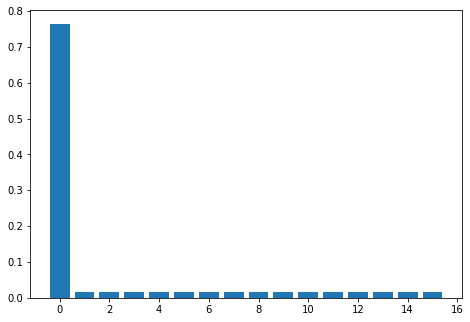

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
students = [0.5625, 0.0625,0.0625, 0.0625, 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.0625, 0.0625, 0.0625, 0.0625]
langs = [i for i in range(len(students))]

ax.bar(langs,ans)
plt.show()

In [18]:
def deutsch_jozsa(promise_var):
    """Implement the Deutsch-Jozsa algorithm and guess the promise variable.
    
    Args:
        promise_var (int): Indicates whether the function is balanced (0) or constant (1).
        
    Returns: 
        int: A guess at the promise variable.
    """
    if promise_var == 0:
        how_many = 2**(n_bits - 1)
    else:
        how_many = np.random.choice([0, 2**n_bits]) # Choose all or nothing randomly
    combos = multisol_combo(n_bits, how_many) # Generate random combinations

    ##################
    # YOUR CODE HERE #
    ##################
    array = multisol_hoh_circuit(combos)
    a,b = np.unique(array.all(),return_counts = True)
    return promise_var